In [1]:
!pip install -U git+https://github.com/paoloripamonti/face-recognition.git

  Cloning https://github.com/paoloripamonti/face-recognition.git to c:\users\acer pc\appdata\local\temp\pip-req-build-1f82jcew
  Resolved https://github.com/paoloripamonti/face-recognition.git to commit 35fa2fb8b55bec41af111bd35f8927588c8c6473
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.3/2.3 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/paoloripamonti/face-recognition.git 'C:\Users\Acer pc\AppData\Local\Temp\pip-req-build-1f82jcew'
ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from facenet-face-recognition) (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==2.4.0


The command !pip install -U git+https://github.com/paoloripamonti/face-recognition.git is used to install the "face-recognition" library from a specific GitHub repository. This library provides a high-level interface for face recognition tasks and is built on top of popular computer vision libraries like OpenCV and dlib.

In [7]:
#Importing the packages
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

In [8]:

# Set the paths to the dataset
lfw_path = 'E:/archive/lfw-deepfunneled/lfw-deepfunneled'

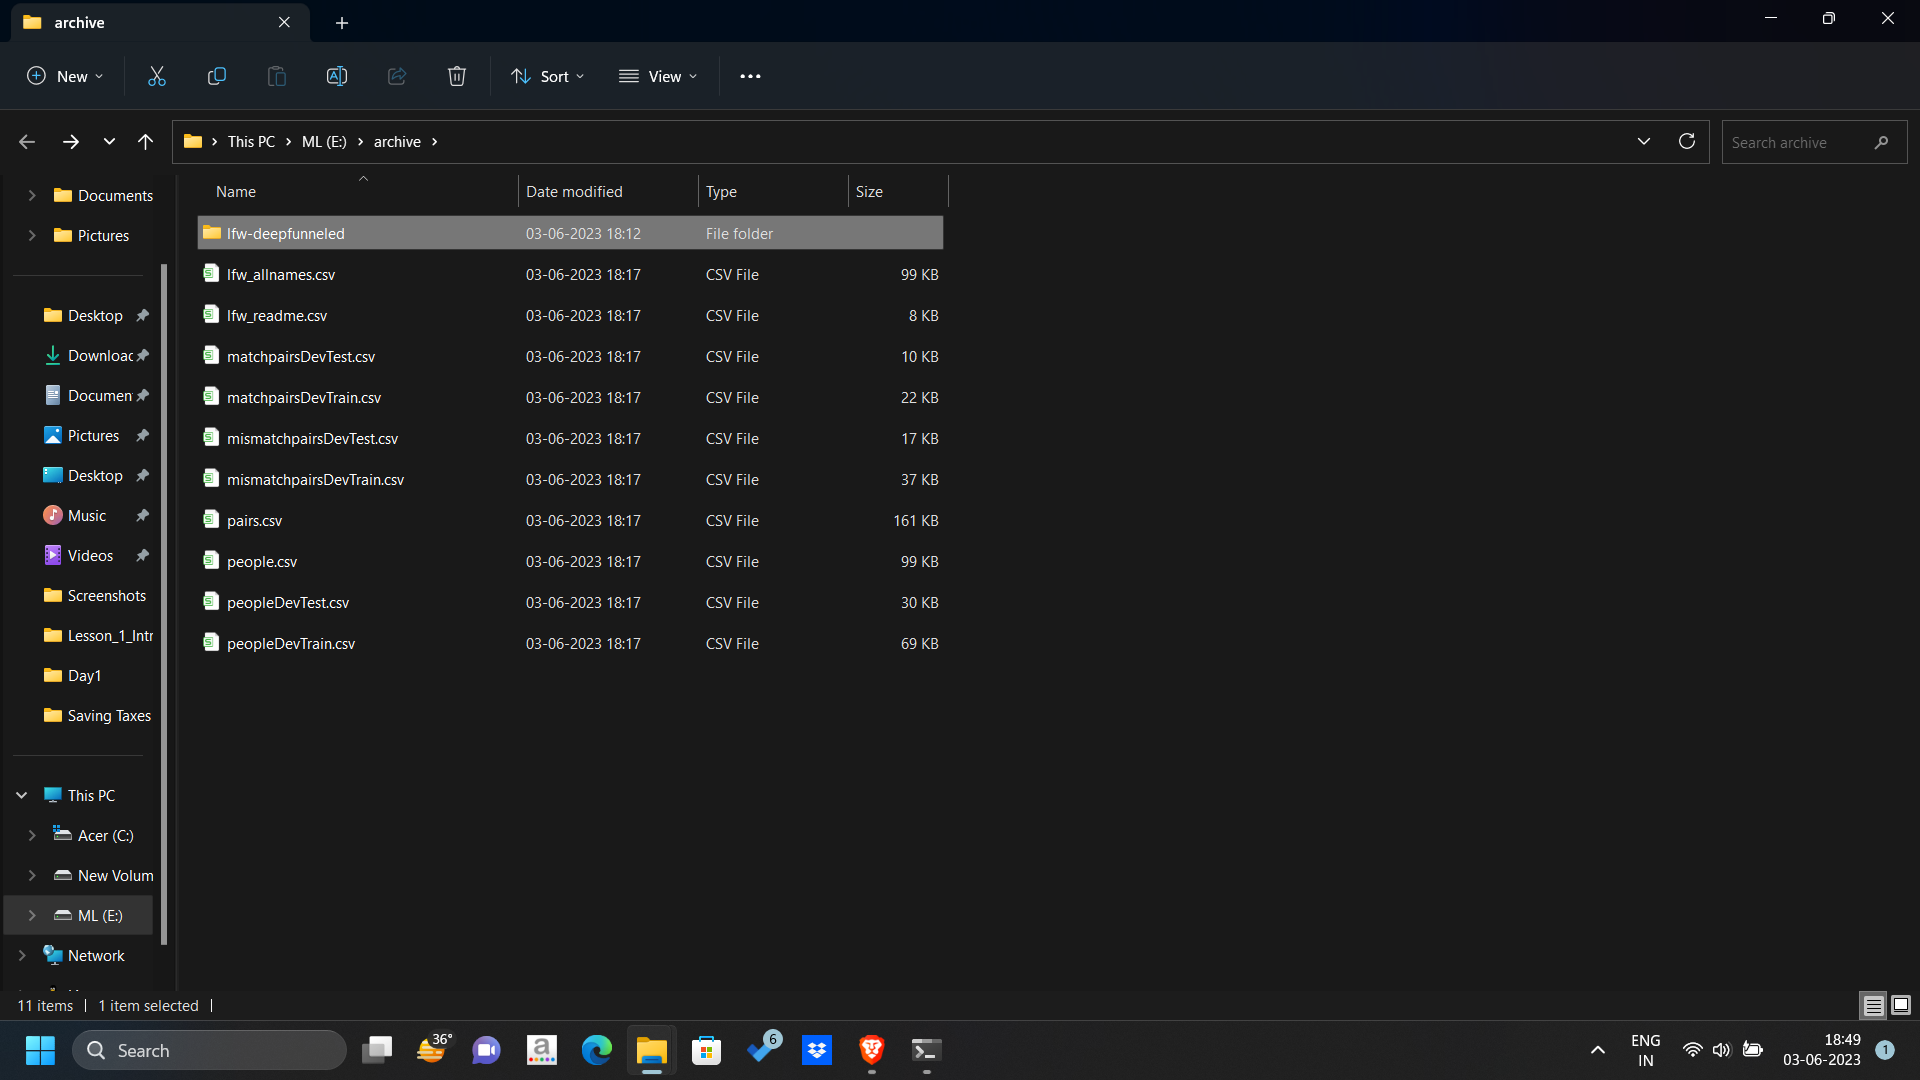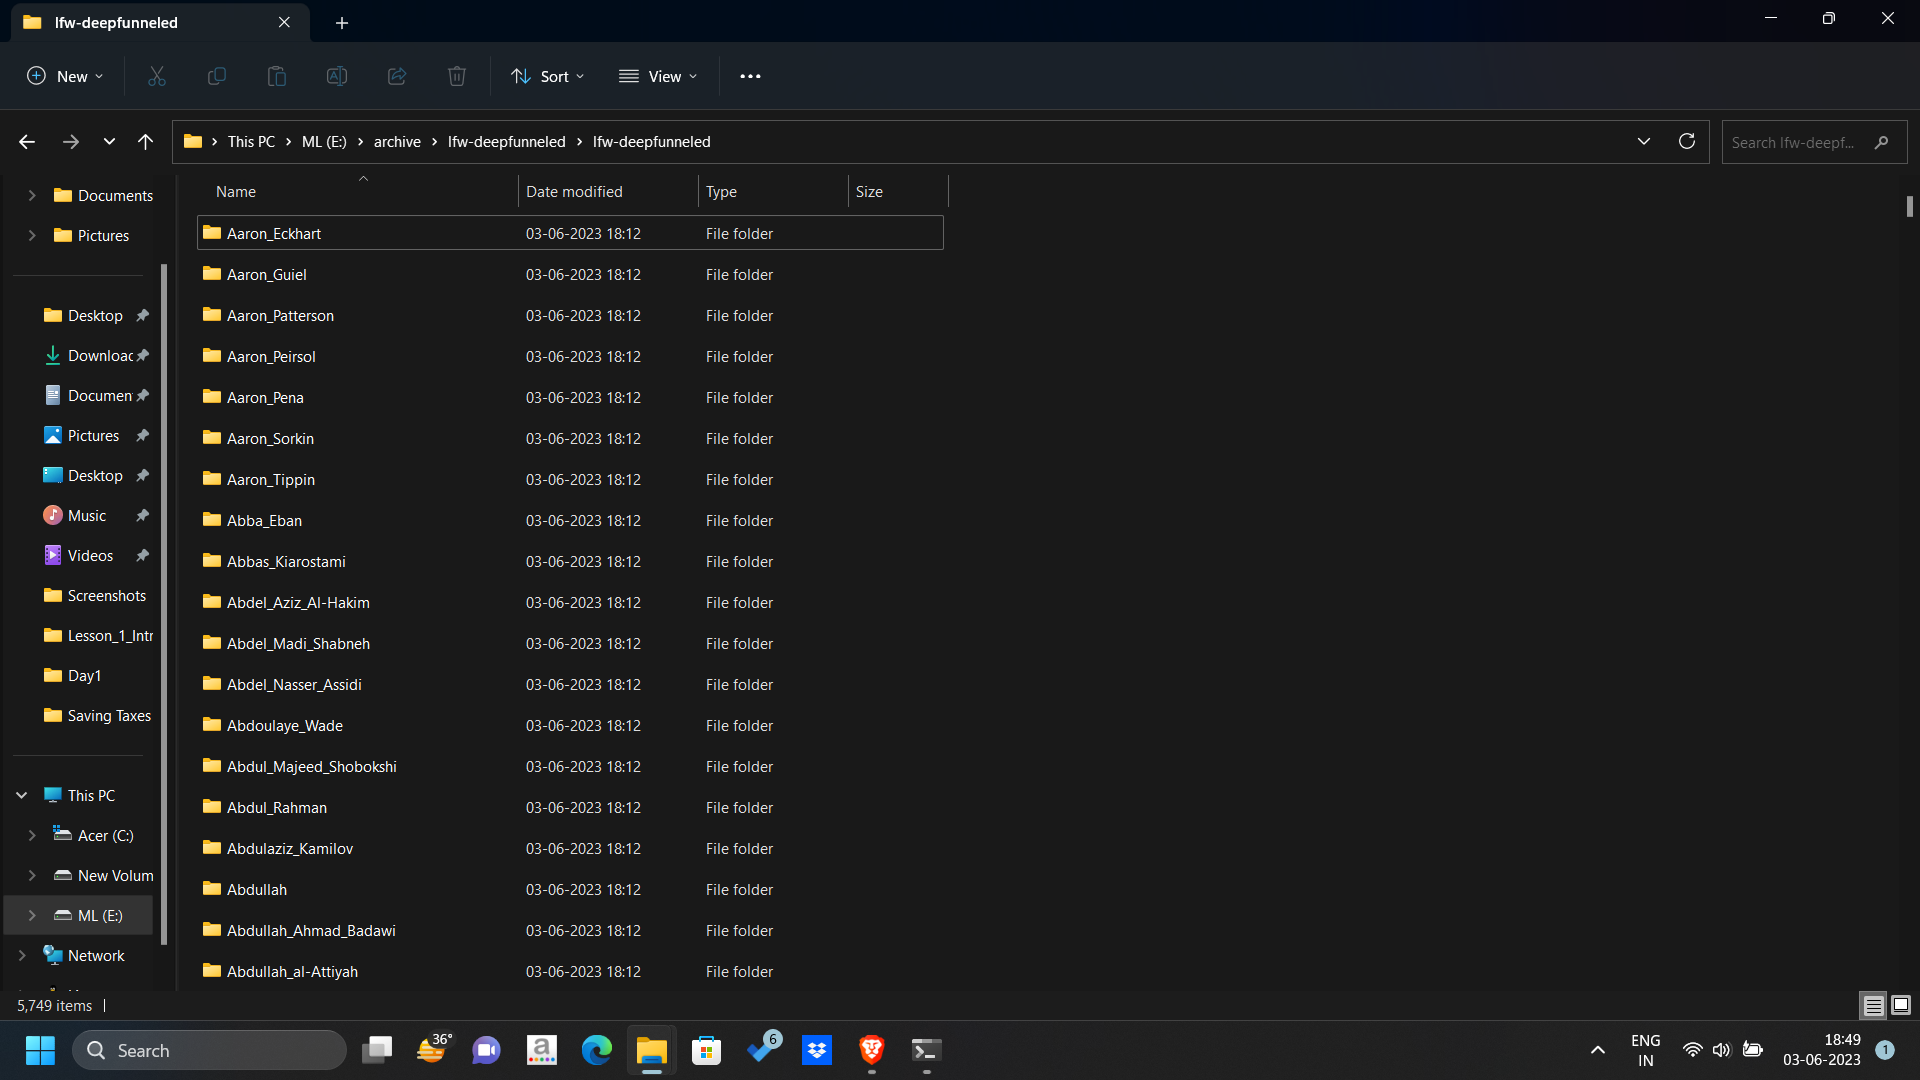

In [9]:
lfw_path

'E:/archive/lfw-deepfunneled/lfw-deepfunneled'

In [45]:
import random

def load_lfw_dataset(n_samples=1000):
    image_paths = []
    labels = []

    for person_dir in os.listdir(lfw_path):
        if not os.path.isdir(os.path.join(lfw_path, person_dir)):
            continue

        for filename in os.listdir(os.path.join(lfw_path, person_dir)):
            img_path = os.path.join(lfw_path, person_dir, filename)
            image_paths.append(img_path)
            labels.append(person_dir)  # Use the directory name as the label

    # Randomly select n_samples from the available images
    random_indices = random.sample(range(len(image_paths)), n_samples)
    images = []

    for i in random_indices:
        img = cv2.imread(image_paths[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (160, 160))
        images.append(img)

    return np.array(images), np.array(labels)


In [46]:
images, labels = load_lfw_dataset(n_samples=1000)

images.shape

(1000, 160, 160, 3)

In [47]:
labels.shape

(13233,)

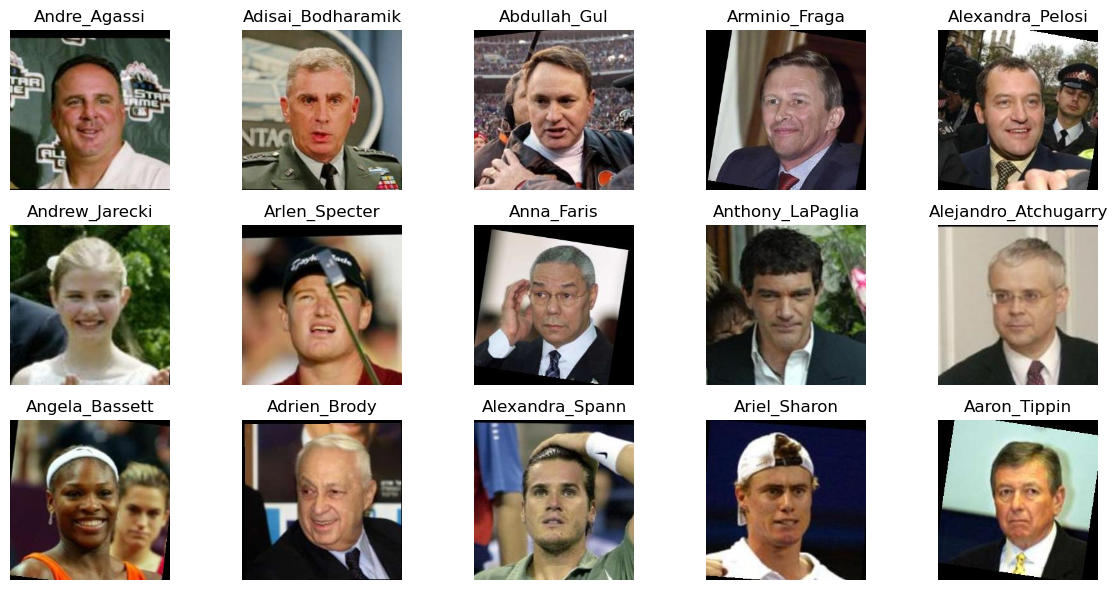

In [48]:
import matplotlib.pyplot as plt
import random

# Assuming you have loaded and preprocessed the LFW dataset into 'images' and 'labels' variables

# Randomly select 15 indices from the available images
random_indices = random.sample(range(len(images)), 15)

# Visualize the randomly selected images
fig, axes = plt.subplots(3, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(15):
    axes[i].imshow(images[random_indices[i]])
    axes[i].set_title(labels[random_indices[i]])
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [58]:
# Split the selected data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels[:1000], test_size=0.2, random_state=42)


In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 160, 160, 3)
(200, 160, 160, 3)
(800,)
(200,)


In [61]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0


In [66]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model


# Define the architecture of the FaceNet model
input_shape = X_train.shape[1:]
input_layer = Input(shape=input_shape)
x = Conv2D(64, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Lambda(lambda x: K.l2_normalize(x, axis=1))(x)
model = Model(inputs=input_layer, outputs=output_layer)

In [67]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 158, 158, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 79, 79, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 77, 77, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 38, 38, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 36, 36, 256)       295168

In [68]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='triplet_loss')

In [80]:
num_epochs = 10
batch_size = 32
num_triplets = len(X_train) // batch_size
for epoch in range(num_epochs):
    print("Epoch {}/{}".format(epoch + 1, num_epochs))
    for i in range(num_triplets):
        X_batch = X_train[i * batch_size: (i + 1) * batch_size]
        y_batch = y_train[i * batch_size: (i + 1) * batch_size]
        triplets = generate_triplets(X_batch, y_batch, batch_size)
        
        if triplets.shape[0] == 0:
            continue
        
        loss = model.train_on_batch(triplets, np.zeros((batch_size, 128)))
        print("Batch {}/{} - Loss: {:.4f}".format(i + 1, num_triplets, loss))


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


C:\Users\Acer pc\AppData\Local\Temp\ipykernel_8100\764607470.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  anchor_indices = np.where(y == anchor_class)[0]
C:\Users\Acer pc\AppData\Local\Temp\ipykernel_8100\764607470.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  positive_indices = np.where(y == positive_class)[0]
C:\Users\Acer pc\AppData\Local\Temp\ipykernel_8100\764607470.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  negative_indices = np.where(y == negative_class)[0]
